In [ ]:
import pandas as pd
df = pd.read_csv('/content/577/diabetes_binary_health_indicators_BRFSS2015.csv')

df.shape


(253680, 22)

In [ ]:
# Checking duplicates rows in dataset df1 to eliminate them

duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()


# eliminating 24206 duplicate rows from the dataset df1
df.drop_duplicates(inplace = True)

df.shape

Duplicate Rows :  24206


(229474, 22)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#grouping categorical variables according to demographics and other factors
d_demographics = ['Age', 'Sex', 'Education', 'Income']
d_healthproblems = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
d_personalhabits = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
d_other = ['AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth']

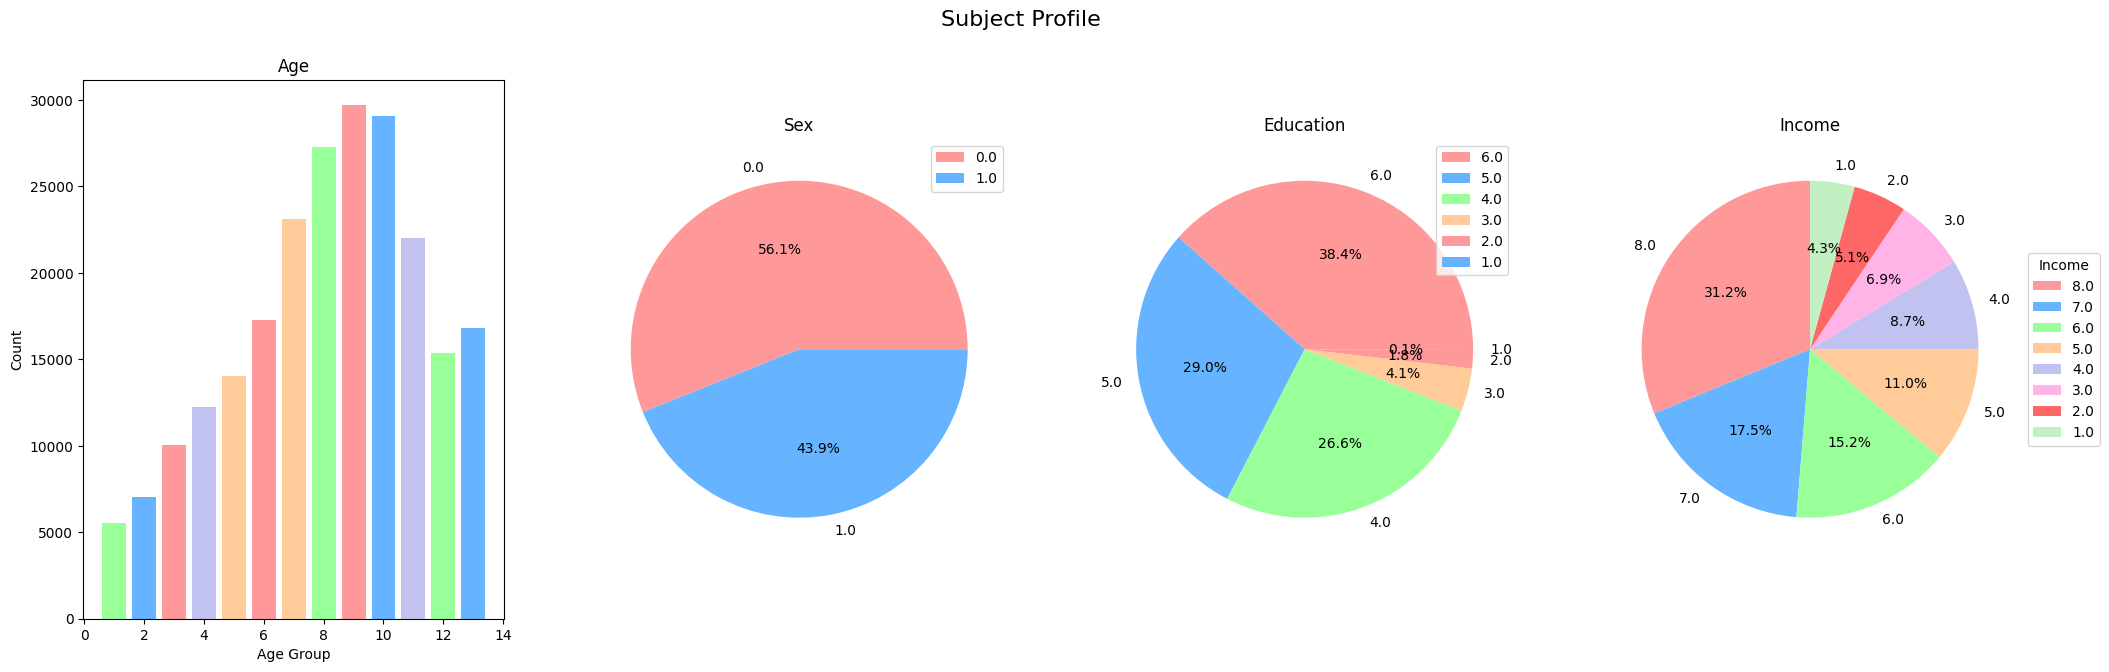

In [ ]:

# Define custom colors for the charts
age_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
sex_colors = ['#ff9999', '#66b3ff']
education_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
income_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2']

# Creating subplots
fig, axes = plt.subplots(1, 4, figsize=(25, 7))  # Increased the size of the chart

# Plotting countplot for 'Age'
axes[0].bar(df['Age'].value_counts().index, df['Age'].value_counts().values, color=age_colors)
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plotting pie charts for 'Sex', 'Education', and 'Income'
for i, col, colors in zip(range(1, 4), ['Sex', 'Education', 'Income'], [sex_colors, education_colors, income_colors]):
    if col == 'Income':
        wedges, texts, autotexts = axes[i].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', colors=colors, startangle=90)
        axes[i].legend(wedges, df[col].value_counts().index, title=col, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))  # Added legend for 'Income'
    else:
        axes[i].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%', colors=colors)
        axes[i].legend(df[col].value_counts().index, loc='upper right')  # Added legend for 'Sex' and 'Education'
    axes[i].set_title(col)

# Adding title
plt.suptitle('Subject Profile', fontsize=16)  # Increased the font size of the title

# Displaying the plot
plt.show()

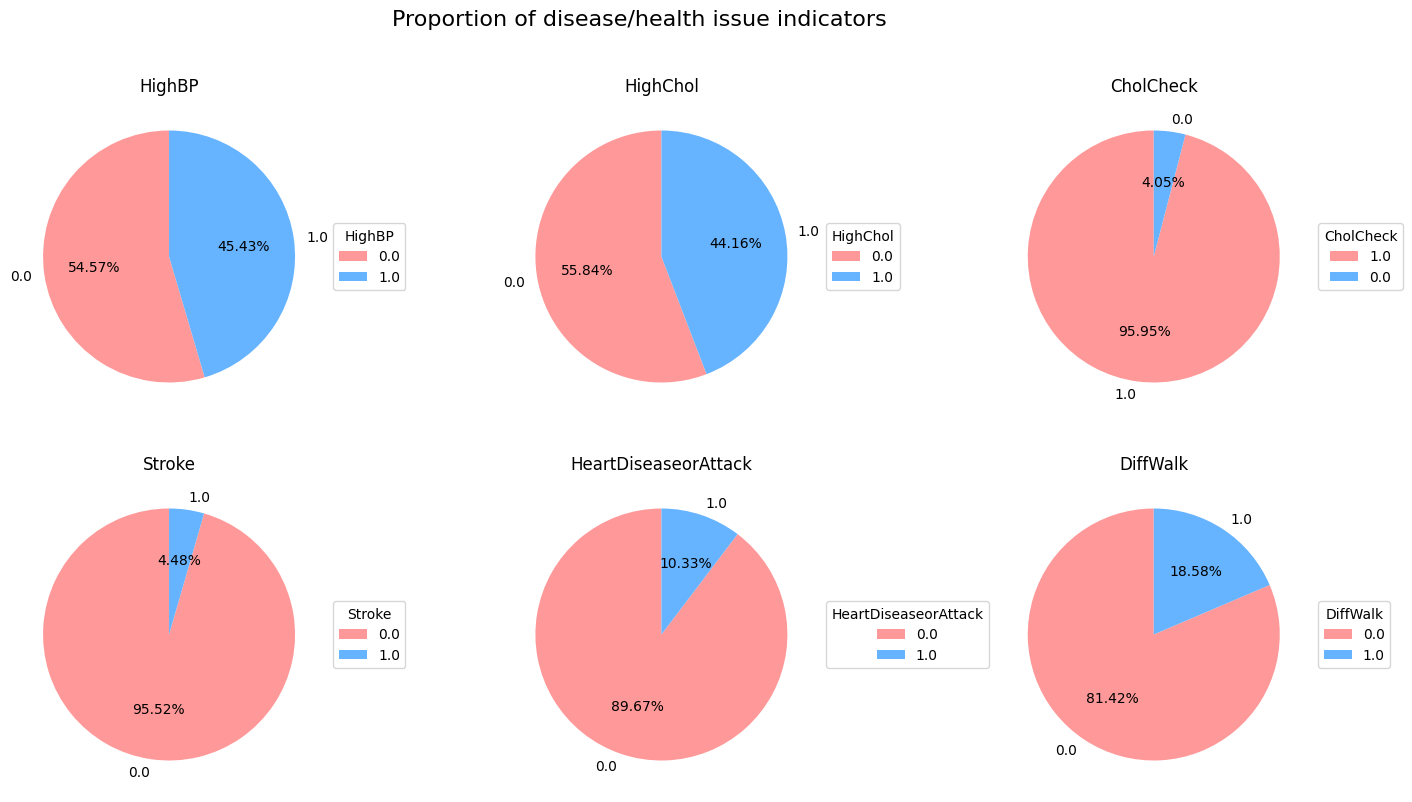

In [ ]:
#Health Problems

# Define custom colors for the pie charts
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2']

# Creating subplots with increased size
fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# Plotting pie charts for each binary health indicator
for i, col in enumerate(d_healthproblems):
    wedges, texts, autotexts = ax[i//3, i%3].pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%.2f%%', colors=colors, startangle=90)
    ax[i//3, i%3].set_title(col)
    ax[i//3, i%3].legend(wedges, df[col].value_counts().index, title=col, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))  # Added legend
    ax[i//3, i%3].set_xlabel('')  # Removed x-axis label
    ax[i//3, i%3].set_ylabel('')  # Removed y-axis label

# Adding overall title
plt.suptitle('Proportion of disease/health issue indicators', fontsize=16)

# Displaying the plot
plt.show()

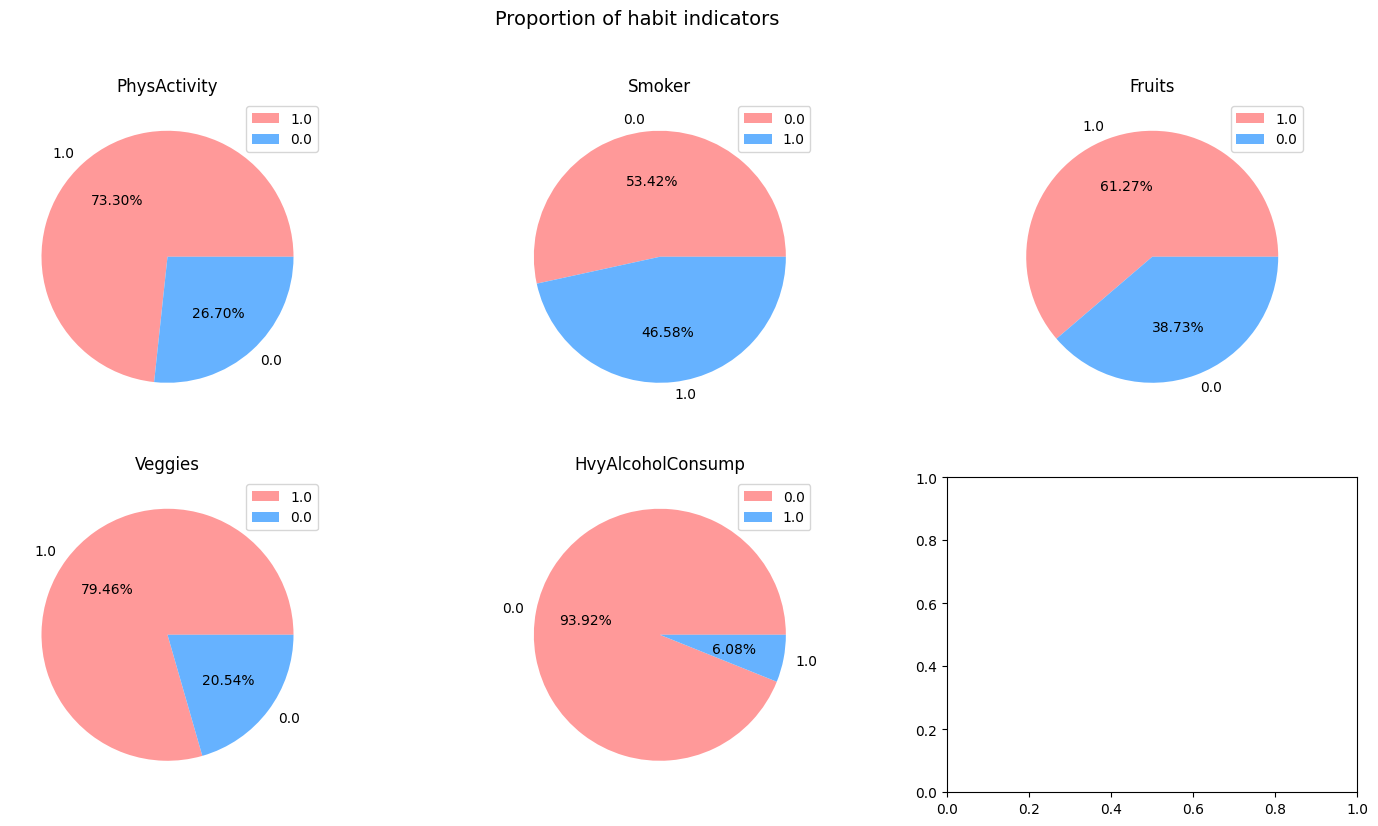

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))  # Increased figure size
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#9370DB']  # Custom colors

for i, col in enumerate(d_personalhabits):
    pie_data = df[col].value_counts()
    ax[i//3, i%3].pie(pie_data, autopct='%.2f%%', colors=colors, labels=pie_data.index)
    ax[i//3, i%3].set_title(col)
    ax[i//3, i%3].legend(pie_data.index, loc='upper right')  # Adding legend
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()

<ipython-input-14-f5a920826129>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, ax=axes[i], palette=colors)
<ipython-input-14-f5a920826129>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(x=col, data=df, ax=axes[i], palette=colors)
<ipython-input-14-f5a920826129>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, ax=axes[i], palette=colors)
<ipython-input-14-f5a920826129>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.countplot(x=col, data=df, ax=axes[i], palette=colors)
<ipython-input-14-f5a920826129>:5: FutureWarni

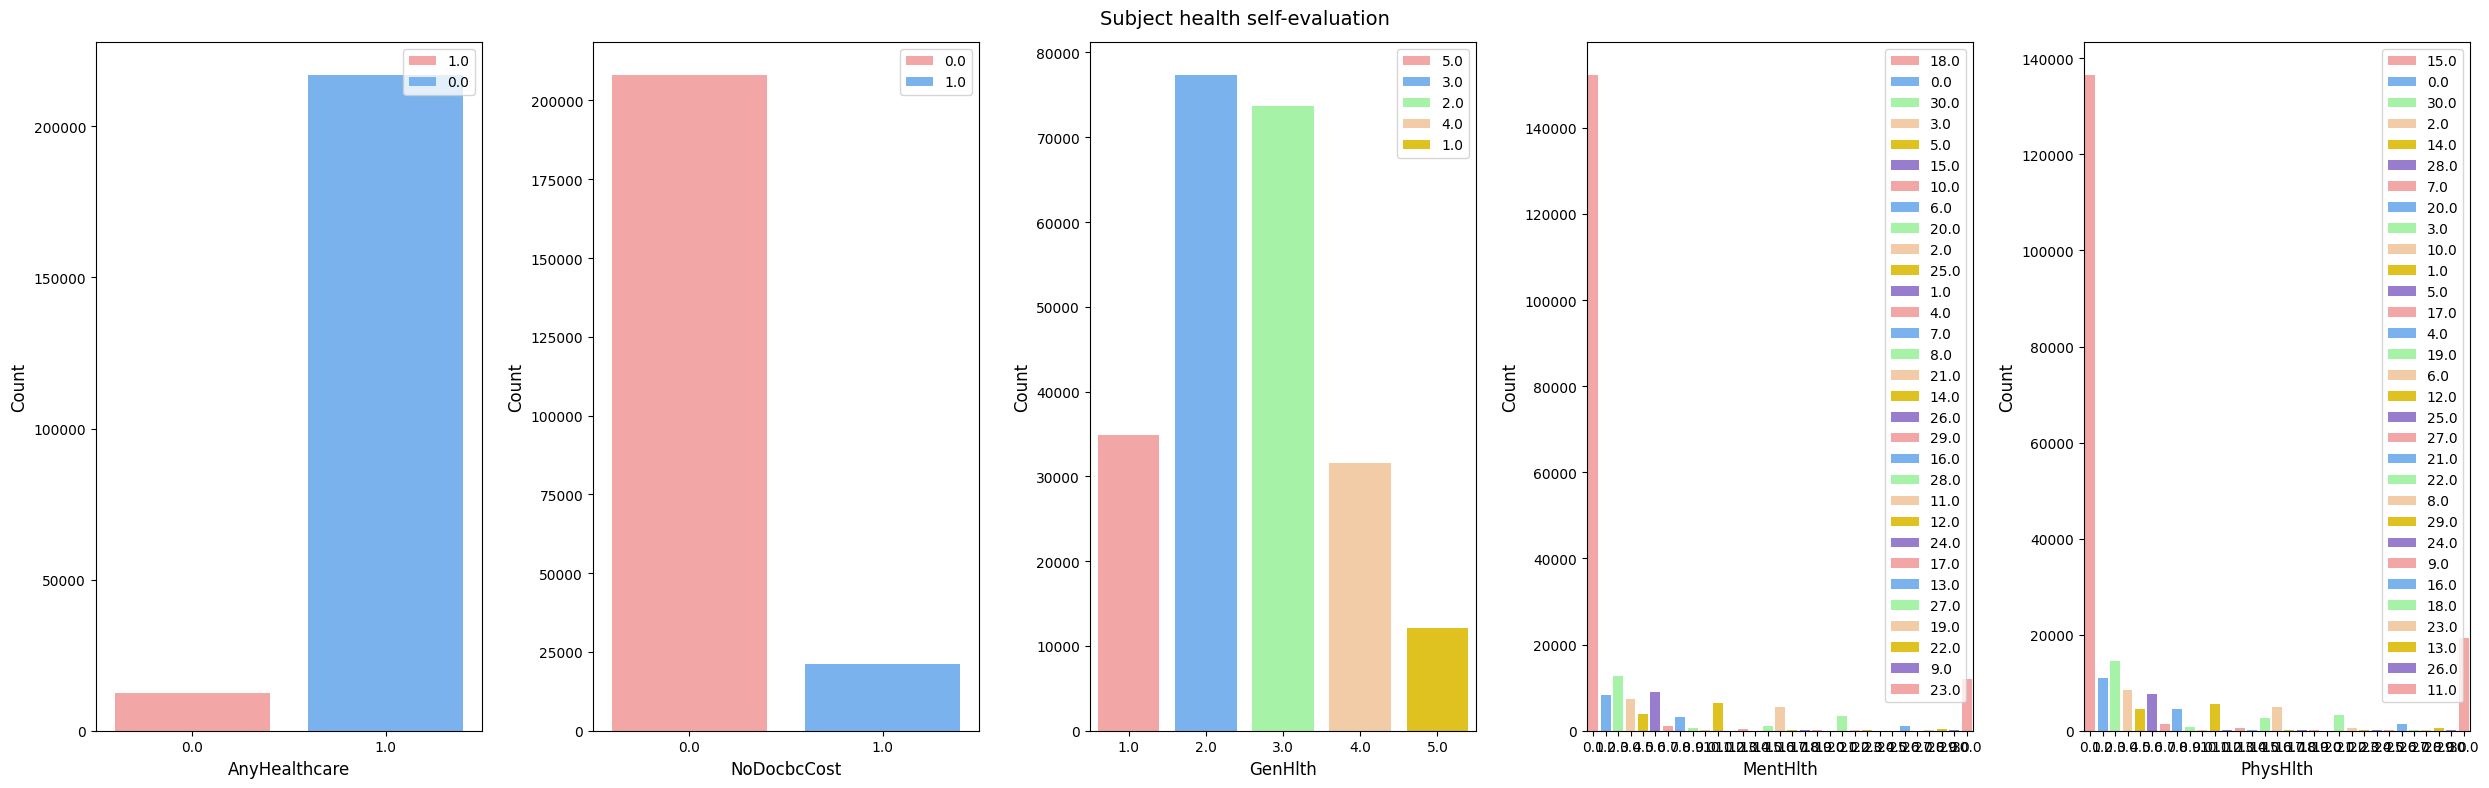

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25, 8))  # Increased figure size
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#9370DB']  # Custom colors

for i, col in enumerate(d_other):
    ax = sns.countplot(x=col, data=df, ax=axes[i], palette=colors)
    ax.set_xlabel(col, fontsize=12)  # Adding labels
    ax.set_ylabel('Count', fontsize=12)  # Adding labels
    ax.legend(df[col].unique(), loc='upper right')  # Adding legend
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Renaming Diabetes type from int to string for better consistency
df['Diabetes_binary_str'] = df['Diabetes_binary'].replace({0.0: 'Healthy', 1.0: 'Diabetic'})

# Calculate percentage of Healthy and Diabetic patients
percentage_healthy = (df['Diabetes_binary'] == 0).mean() * 100
percentage_diabetic = (df['Diabetes_binary'] == 1).mean() * 100

print("Percentage of Patients Are Healthy: {:.2f}%".format(percentage_healthy))
print("Percentage of Patients Have Diabetic: {:.2f}%".format(percentage_diabetic))

Percentage of Patients Are Healthy: 84.71%
Percentage of Patients Have Diabetic: 15.29%


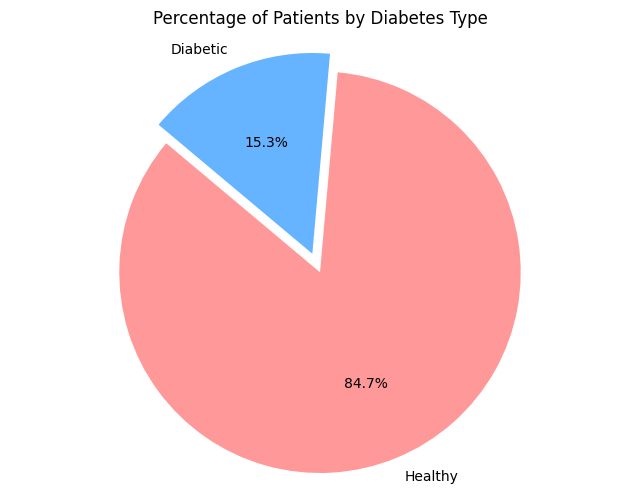

In [ ]:
# Calculate percentage of Healthy and Diabetic patients
percentage_healthy = (df['Diabetes_binary'] == 0).mean() * 100
percentage_diabetic = (df['Diabetes_binary'] == 1).mean() * 100

# Define data for the pie chart
labels = ['Healthy', 'Diabetic']
sizes = [percentage_healthy, percentage_diabetic]
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)  # explode the 2nd slice (i.e. 'Diabetic')

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Patients by Diabetes Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
def mean_target(var):
    """
    A function that returns the mean values for the 'var' column based on whether the person is diabetic or not.
    """
    return pd.DataFrame(df.groupby('Diabetes_binary_str')[var].mean())

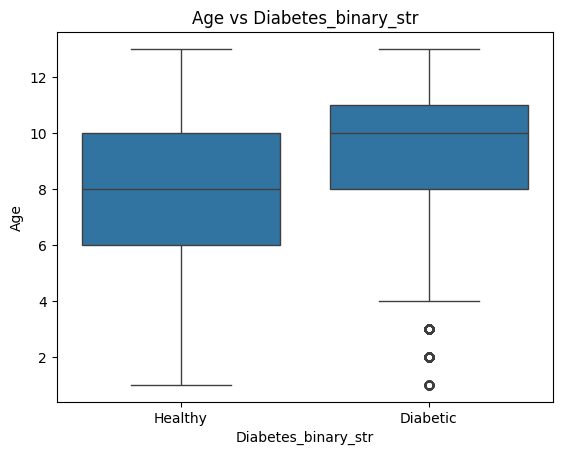

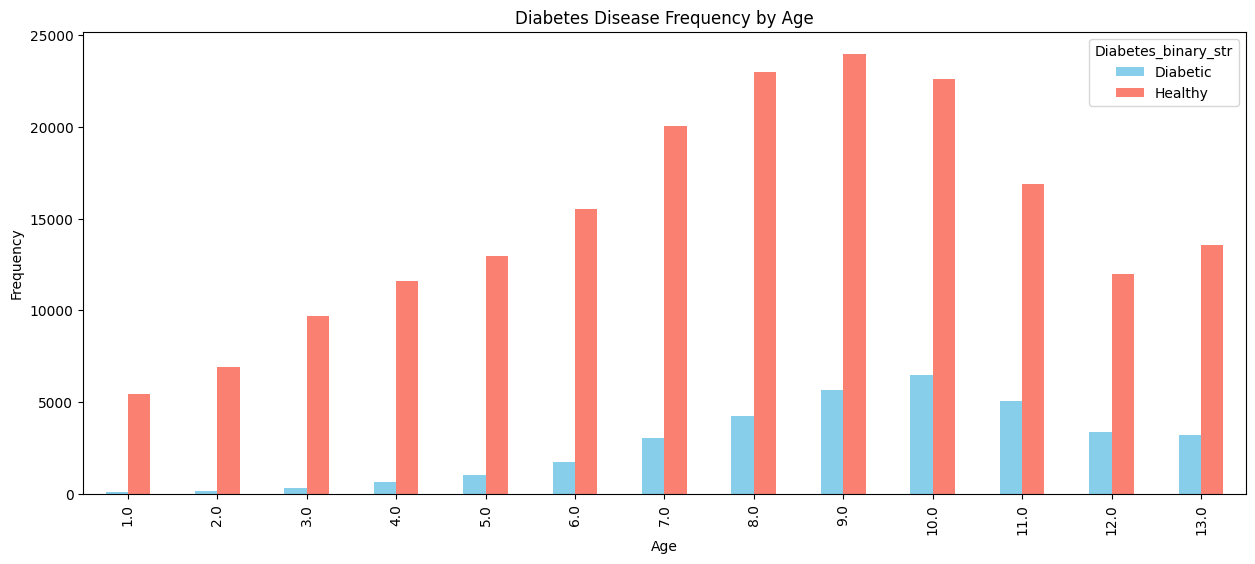

Age,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Diabetes_binary_str,,,,,,,,,,,,,
Diabetic,78,140,314,625,1049,1741,3072,4241,5681,6483,5090,3383,3200
Healthy,5433,6924,9709,11604,12991,15539,20049,23031,23997,22610,16903,11996,13591


In [ ]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = df)
plt.title('Age vs Diabetes_binary_str')
plt.show()

pd.crosstab(df.Age, df.Diabetes_binary_str).plot(kind="bar", figsize=(15, 6), color=['skyblue', 'salmon'])
plt.title('Diabetes Disease Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(df["Diabetes_binary_str"], df["Age"])

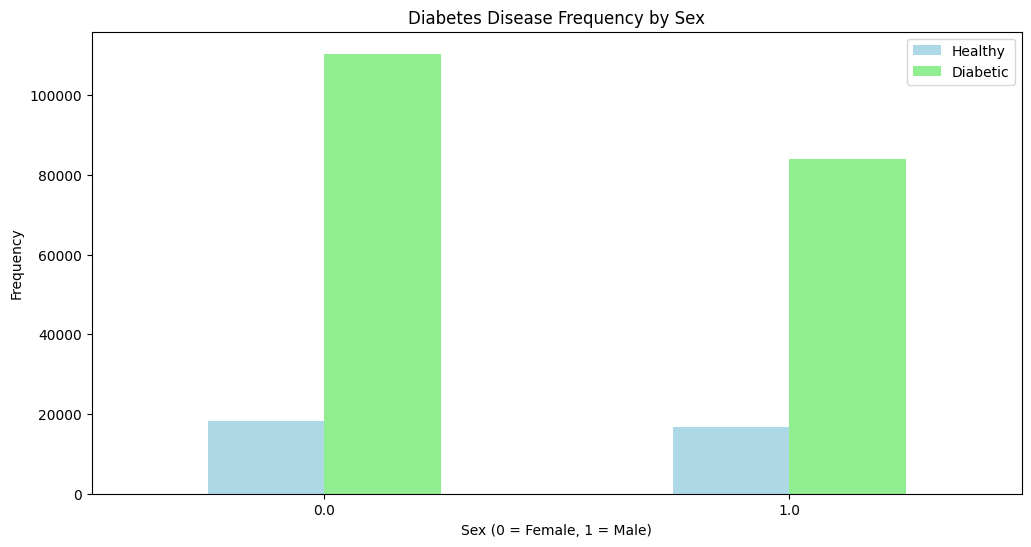

Sex,0.0,1.0
Diabetes_binary_str,,
Diabetic,18345,16752
Healthy,110370,84007


In [ ]:
#Sex

pd.crosstab(df.Sex, df.Diabetes_binary_str).plot(kind="bar", figsize=(12, 6), color=['lightblue', 'lightgreen'])
plt.title('Diabetes Disease Frequency by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Healthy", "Diabetic"])
plt.ylabel('Frequency')
plt.show()

pd.crosstab(df["Diabetes_binary_str"], df["Sex"])

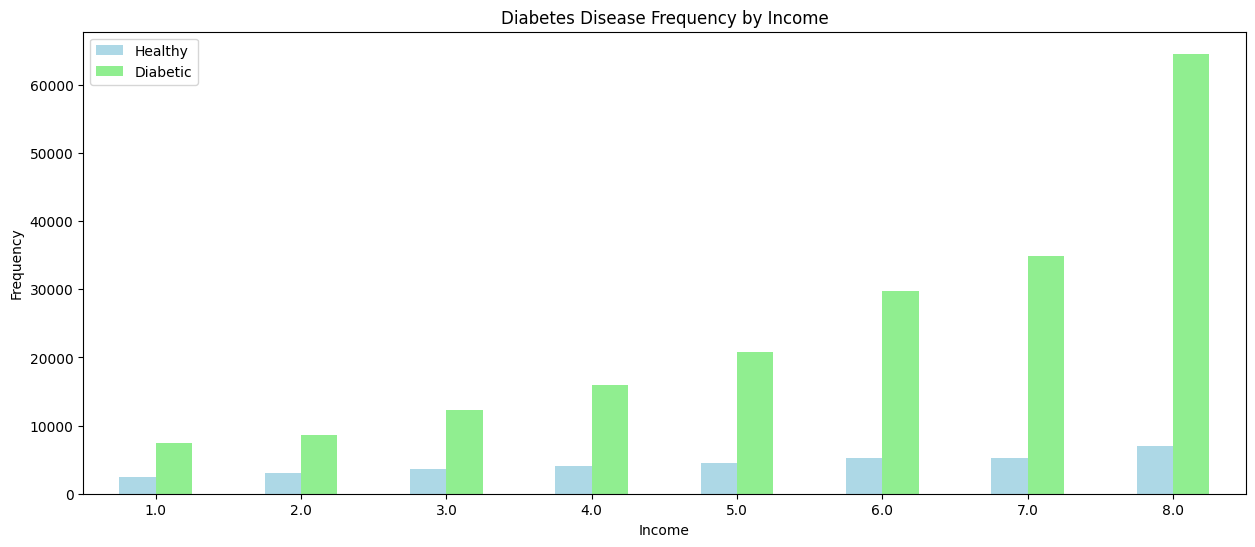

Income,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Diabetes_binary_str,,,,,,,,
Diabetic,2383,3086,3564,4047,4489,5260,5226,7042
Healthy,7408,8670,12356,15906,20837,29697,34905,64598


In [ ]:
#Income

pd.crosstab(df.Income, df.Diabetes_binary_str).plot(kind="bar", figsize=(15, 6), color=['lightblue', 'lightgreen'])
plt.title('Diabetes Disease Frequency by Income')
plt.xlabel('Income')
plt.xticks(rotation=0)
plt.legend(["Healthy", "Diabetic"])
plt.ylabel('Frequency')
plt.show()

pd.crosstab(df["Diabetes_binary_str"], df["Income"])

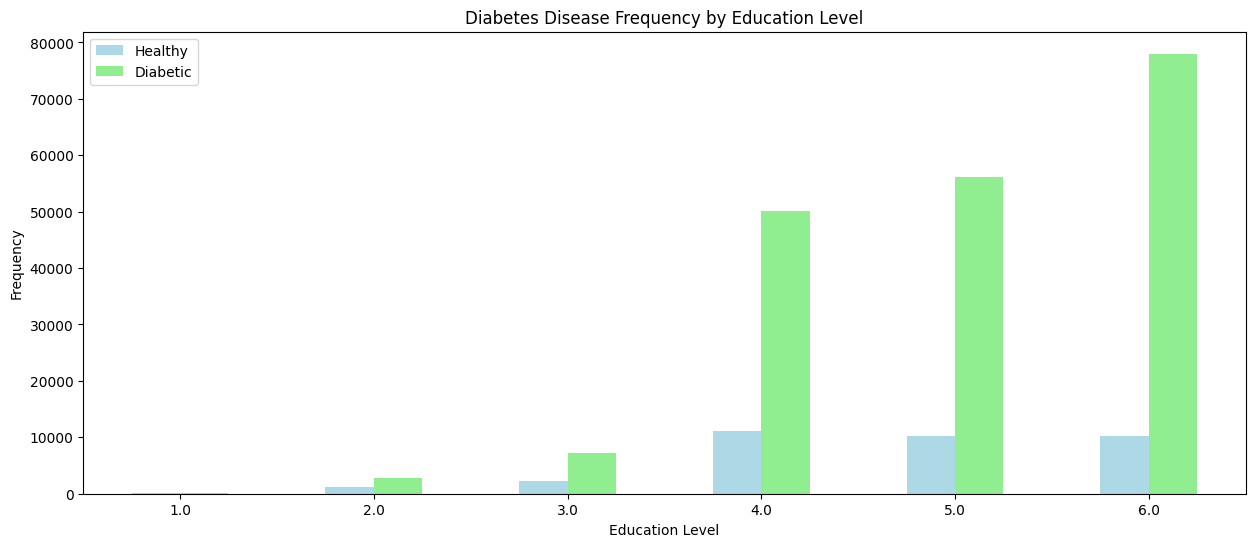

Education,1.0,2.0,3.0,4.0,5.0,6.0
Diabetes_binary_str,,,,,,
Diabetic,47,1183,2296,11032,10311,10228
Healthy,127,2857,7171,50092,56133,77997


In [ ]:
#Education
pd.crosstab(df.Education, df.Diabetes_binary_str).plot(kind="bar", figsize=(15, 6), color=['lightblue', 'lightgreen'])
plt.title('Diabetes Disease Frequency by Education Level')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.legend(["Healthy", "Diabetic"])
plt.ylabel('Frequency')
plt.show()

pd.crosstab(df["Diabetes_binary_str"], df["Education"])